## Importiamo le librerie necessarie

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## Importazione dati e creazione di un dataframe
- Importiamo il dataset (dataset3) e lo inseriamo in un dataframe di pandas chiamato pagamenti
- visualizziamo le prime 5 righe del dataframe

In [3]:
pagamenti = pd.read_csv("dataset3.csv")
pagamenti.head()

,Timestamp,User ID,Beneficiary ID,Amount,Transaction ID,Transaction Type,Payment Method,Account Balance Before,Account Balance After,Transaction Status,Location,Category,Fee,Tax
0,2023-10-18 15:04:28,478,7225,675.09,9af1a39a-d229-4120-8dfc-2f9cac3bbb21,payment,bank transfer,6063.69,5388.60,completed,"Villa Ripa, Bergamo, Italia",Sport,3.55,1.74
1,2024-02-07 08:28:19,750,7705,157.68,f0e6f760-e951-43a7-826b-9ec73c2de977,payment,PayPal,7975.02,7817.34,completed,"Leonforte, Firenze, Italia",Vestiti,3.40,1.80
2,2024-03-24 13:22:59,67,3006,13.09,2cd70498-4d4d-4fa3-a094-f27eb1f60781,payment,PayPal,4549.07,4535.98,completed,"Gonnosno', Belluno, Italia",Netflix,0.50,2.84
3,2023-01-21 08:40:44,97,7741,56.57,84fd3fe1-fe4d-46dc-b2b4-633d4f0688ec,payment,credit card,4279.21,4222.64,completed,"Santi Cosma E Damiano, Pisa, Italia",Alimentari,0.70,2.62
4,2023-01-15 09:26:00,725,7573,87.32,00cfe072-e077-4dbf-9c75-9e93897094cb,payment,PayPal,2441.96,2354.64,completed,"Pedivigliano, Perugia, Italia",Alimentari,2.60,2.03


Vogliamo provare a creare un modello di predizione delle categorie, importiamo quindi da scikit-learn le librerie necessarie

In [8]:
from sklearn.model_selection import train_test_split

#selezioniamo i dati che servono per la predizione
X = pagamenti[["User ID", "Beneficiary ID", "Amount"]]
#selezioniamo le etichette da predirre
y = pagamenti["Category"]

#Creiamo tramite train_test_split le porzioni di dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
#Abbiamo assegnato 80% del dataset per il train e il 20% per il test, diamo un check
len(X_train), len(X_test)

(80000, 20000)

Importiamo un modello di classificazione e passiamoli la porzione di train per allenarlo e ottenere uno score

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.62685

In [14]:
#Risultato non soddisfacente proviamo a vedere con diversi numeri di neighbors

for i in range(5, 100, 5):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    print("Il punteggio con ", i, " neighbors è: ", knn_model.score(X_test, y_test))



Il punteggio con  5  neighbors è:  0.62685
Il punteggio con  10  neighbors è:  0.6149
Il punteggio con  15  neighbors è:  0.6196
Il punteggio con  20  neighbors è:  0.6194
Il punteggio con  25  neighbors è:  0.61495
Il punteggio con  30  neighbors è:  0.6073
Il punteggio con  35  neighbors è:  0.60805
Il punteggio con  40  neighbors è:  0.6053
Il punteggio con  45  neighbors è:  0.6059
Il punteggio con  50  neighbors è:  0.6026
Il punteggio con  55  neighbors è:  0.60315
Il punteggio con  60  neighbors è:  0.5983
Il punteggio con  65  neighbors è:  0.6005
Il punteggio con  70  neighbors è:  0.5994
Il punteggio con  75  neighbors è:  0.6
Il punteggio con  80  neighbors è:  0.5963
Il punteggio con  85  neighbors è:  0.5965
Il punteggio con  90  neighbors è:  0.59465
Il punteggio con  95  neighbors è:  0.59465


In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
new_user = {
    "User ID": 1000,
    "Beneficiary ID": 6012,
    "Amount": 240.00,
}

new_user_array = np.array([list(new_user.values())])

# Prevedere la categoria per il nuovo utente
predicted_category = knn_model.predict(new_user_array)

print("Categoria prevista per il nuovo utente:", predicted_category[0])

Categoria prevista per il nuovo utente: Vestiti


c:\Users\filip\Desktop\Tirocinio\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Provo a eliminare la colonna Beneficiary ID, in quanto potrebbe avere dei bias dati dal numero

In [28]:
X = pagamenti[["User ID", "Amount"]]
y = pagamenti["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.3343

In [45]:
new_user = {
    "User ID": 1000,
    "Amount": 8.00,
}

new_user_array = np.array([list(new_user.values())])

# Prevedere la categoria per il nuovo utente
predicted_category = knn_model.predict(new_user_array)

print("Categoria prevista per il nuovo utente:", predicted_category[0])

Categoria prevista per il nuovo utente: Disney+


c:\Users\filip\Desktop\Tirocinio\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [46]:
new_user = {
    "User ID": 1000,
    "Amount": 12.00,
}

new_user_array = np.array([list(new_user.values())])

# Prevedere la categoria per il nuovo utente
predicted_category = knn_model.predict(new_user_array)

print("Categoria prevista per il nuovo utente:", predicted_category[0])

Categoria prevista per il nuovo utente: Netflix


c:\Users\filip\Desktop\Tirocinio\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [47]:
new_user = {
    "User ID": 1000,
    "Amount": 50.00,
}

new_user_array = np.array([list(new_user.values())])

# Prevedere la categoria per il nuovo utente
predicted_category = knn_model.predict(new_user_array)

print("Categoria prevista per il nuovo utente:", predicted_category[0])

Categoria prevista per il nuovo utente: Farmacia


c:\Users\filip\Desktop\Tirocinio\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [48]:
new_user = {
    "User ID": 1000,
    "Amount": 70.00,
}

new_user_array = np.array([list(new_user.values())])

# Prevedere la categoria per il nuovo utente
predicted_category = knn_model.predict(new_user_array)

print("Categoria prevista per il nuovo utente:", predicted_category[0])

Categoria prevista per il nuovo utente: Alimentari


c:\Users\filip\Desktop\Tirocinio\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [50]:
new_user = {
    "User ID": 1000,
    "Amount": 100.00,
}

new_user_array = np.array([list(new_user.values())])

# Prevedere la categoria per il nuovo utente
predicted_category = knn_model.predict(new_user_array)

print("Categoria prevista per il nuovo utente:", predicted_category[0])

Categoria prevista per il nuovo utente: Amazon


c:\Users\filip\Desktop\Tirocinio\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [51]:
new_user = {
    "User ID": 1000,
    "Amount": 350.00,
}

new_user_array = np.array([list(new_user.values())])

# Prevedere la categoria per il nuovo utente
predicted_category = knn_model.predict(new_user_array)

print("Categoria prevista per il nuovo utente:", predicted_category[0])

Categoria prevista per il nuovo utente: Elettronica


c:\Users\filip\Desktop\Tirocinio\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [52]:
new_user = {
    "User ID": 1000,
    "Amount": 250.00,
}

new_user_array = np.array([list(new_user.values())])

# Prevedere la categoria per il nuovo utente
predicted_category = knn_model.predict(new_user_array)

print("Categoria prevista per il nuovo utente:", predicted_category[0])

Categoria prevista per il nuovo utente: Vestiti


c:\Users\filip\Desktop\Tirocinio\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Classifica un po' a caso, ovvero guarda un range del costo e lo suddivide in categorie. Il problema è che diverse categorie hanno lo stesso range di costo, il che lo rende casuale.

Per me i passaggi che si dovranno fare con il dataset reale sono:

- pulizia dei dati superflui o valori mancanti

Qui si prende un bivio:
- categorizzare il commerciante e tramite modello di raccomandazione predirre in quali categorie spenderà in futuro tramite i pagamenti precedenti
- fare un clustering dei diversi utenti per classificarli in diverse etichette (VOlendo si può categorizzare per reddito in base a quanto spendono o chi è disposto a spendere di più)

In [54]:
pagamenti.head()

,Timestamp,User ID,Beneficiary ID,Amount,Transaction ID,Transaction Type,Payment Method,Account Balance Before,Account Balance After,Transaction Status,Location,Category,Fee,Tax
0,2023-10-18 15:04:28,478,7225,675.09,9af1a39a-d229-4120-8dfc-2f9cac3bbb21,payment,bank transfer,6063.69,5388.60,completed,"Villa Ripa, Bergamo, Italia",Sport,3.55,1.74
1,2024-02-07 08:28:19,750,7705,157.68,f0e6f760-e951-43a7-826b-9ec73c2de977,payment,PayPal,7975.02,7817.34,completed,"Leonforte, Firenze, Italia",Vestiti,3.40,1.80
2,2024-03-24 13:22:59,67,3006,13.09,2cd70498-4d4d-4fa3-a094-f27eb1f60781,payment,PayPal,4549.07,4535.98,completed,"Gonnosno', Belluno, Italia",Netflix,0.50,2.84
3,2023-01-21 08:40:44,97,7741,56.57,84fd3fe1-fe4d-46dc-b2b4-633d4f0688ec,payment,credit card,4279.21,4222.64,completed,"Santi Cosma E Damiano, Pisa, Italia",Alimentari,0.70,2.62
4,2023-01-15 09:26:00,725,7573,87.32,00cfe072-e077-4dbf-9c75-9e93897094cb,payment,PayPal,2441.96,2354.64,completed,"Pedivigliano, Perugia, Italia",Alimentari,2.60,2.03


In [57]:
pagamenti["Timestamp"]

0        2023-10-18 15:04:28
1        2024-02-07 08:28:19
2        2024-03-24 13:22:59
3        2023-01-21 08:40:44
4        2023-01-15 09:26:00
                ...         
99995    2023-02-19 04:40:27
99996    2023-03-05 18:11:28
99997    2023-09-06 12:58:50
99998    2023-06-08 19:35:09
99999    2024-05-14 11:01:16
Name: Timestamp, Length: 100000, dtype: object

In [58]:
pagamenti["Timestamp"].astype(str)

0        2023-10-18 15:04:28
1        2024-02-07 08:28:19
2        2024-03-24 13:22:59
3        2023-01-21 08:40:44
4        2023-01-15 09:26:00
                ...         
99995    2023-02-19 04:40:27
99996    2023-03-05 18:11:28
99997    2023-09-06 12:58:50
99998    2023-06-08 19:35:09
99999    2024-05-14 11:01:16
Name: Timestamp, Length: 100000, dtype: object

In [63]:
pagamenti["Timestamp"] = pagamenti["Timestamp"].str[:-1]
pagamenti["Timestamp"].head()

0    2023-10-18
1    2024-02-07
2    2024-03-24
3    2023-01-21
4    2023-01-15
Name: Timestamp, dtype: object

In [64]:
pagamenti["Timestamp"].head()

0    2023-10-18
1    2024-02-07
2    2024-03-24
3    2023-01-21
4    2023-01-15
Name: Timestamp, dtype: object

In [74]:
pagamenti["Timestamp"].astype("datetime64[ns]")

0       2023-10-18
1       2024-02-07
2       2024-03-24
3       2023-01-21
4       2023-01-15
           ...    
99995   2023-02-19
99996   2023-03-05
99997   2023-09-06
99998   2023-06-08
99999   2024-05-14
Name: Timestamp, Length: 100000, dtype: datetime64[ns]

In [82]:
pagamenti["Timestamp"] = pd.to_datetime(pagamenti["Timestamp"])


pagamenti["Anno"] = pagamenti["Timestamp"].dt.year
pagamenti["Mese"] = pagamenti["Timestamp"].dt.month
pagamenti.head()

,Timestamp,User ID,Beneficiary ID,Amount,Transaction ID,Transaction Type,Payment Method,Account Balance Before,Account Balance After,Transaction Status,Location,Category,Fee,Tax,Anno,Mese
0,2023-10-18,478,7225,675.09,9af1a39a-d229-4120-8dfc-2f9cac3bbb21,payment,bank transfer,6063.69,5388.60,completed,"Villa Ripa, Bergamo, Italia",Sport,3.55,1.74,2023,10
1,2024-02-07,750,7705,157.68,f0e6f760-e951-43a7-826b-9ec73c2de977,payment,PayPal,7975.02,7817.34,completed,"Leonforte, Firenze, Italia",Vestiti,3.40,1.80,2024,2
2,2024-03-24,67,3006,13.09,2cd70498-4d4d-4fa3-a094-f27eb1f60781,payment,PayPal,4549.07,4535.98,completed,"Gonnosno', Belluno, Italia",Netflix,0.50,2.84,2024,3
3,2023-01-21,97,7741,56.57,84fd3fe1-fe4d-46dc-b2b4-633d4f0688ec,payment,credit card,4279.21,4222.64,completed,"Santi Cosma E Damiano, Pisa, Italia",Alimentari,0.70,2.62,2023,1
4,2023-01-15,725,7573,87.32,00cfe072-e077-4dbf-9c75-9e93897094cb,payment,PayPal,2441.96,2354.64,completed,"Pedivigliano, Perugia, Italia",Alimentari,2.60,2.03,2023,1


In [91]:

def spesa_annua(n_user, year):
    user = pagamenti[pagamenti["User ID"] == n_user]
    spesa_anno = user[user["Anno"] == year]
    total = spesa_anno["Amount"].sum()
    print("La spesa complessiva nell'anno ", year, " è di ", total, "€")

spesa_annua(67, 2023)

La spesa complessiva nell'anno  2023  è di  16253.5 €


In [145]:
def plot_spesa_annua(n_user, year):
    X = pagamenti[["User ID", "Amount", "Anno", "Mese"]]
    user = X[X["User ID"] == n_user]
    spesa_anno = user[user["Anno"] == year]
    spesa_mese = spesa_anno.groupby(["Mese"])["Amount"].sum()
    tabella_finale = pd.DataFrame({
    "UserID": n_user,
    "Amount": spesa_mese.values,
    "Anno": year,
    "Mese": spesa_mese.index.to_list()
    })


    fig, ax = plt.subplots()
    ax.plot(tabella_finale["Mese"], tabella_finale["Amount"], linestyle="solid")
    ax.set(xlabel="Mesi",
           ylabel="Spesa totale in €",
           title=f"Spesa anno {year} utente {n_user}")


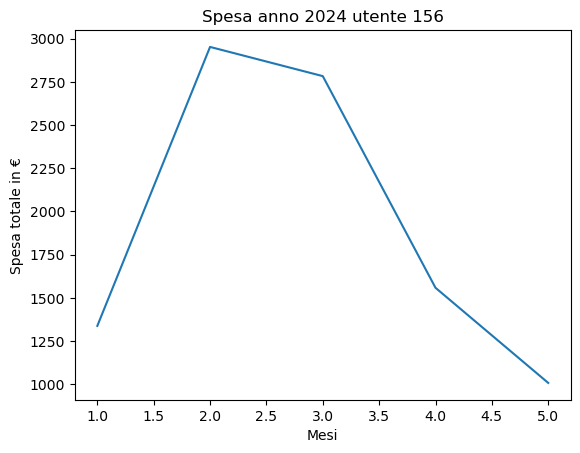

In [146]:
plot_spesa_annua(156, 2024)

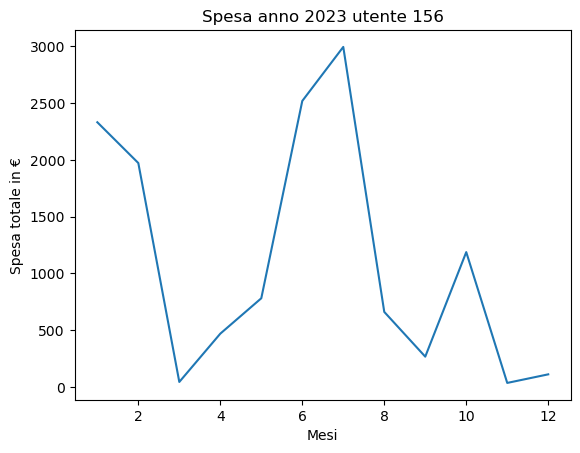

In [148]:
plot_spesa_annua(156, 2023)